### Gradient Descent

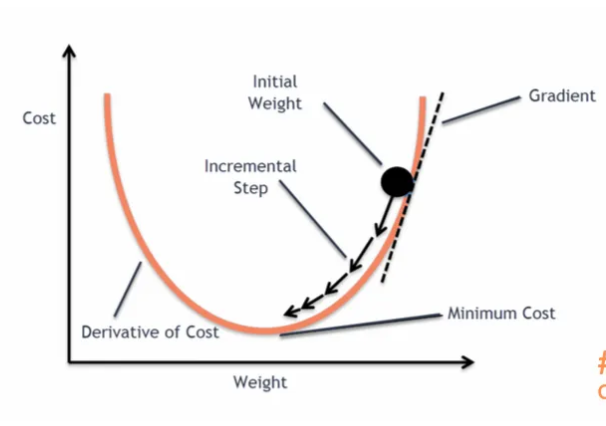

In [ ]:
import torch # 
inputs = torch.tensor([
    [1,2],
    [3,4],
    [5,6],
    [7,8]
    ], dtype=torch.float32)


y_true = torch.tensor([
    [10],
    [20],
    [30],
    [40]
    ], dtype=torch.float32)


# Initialize weight and bias

weights = torch.rand((2,1), requires_grad=True)
bias = torch.rand((1,), requires_grad=True)


epochs = 1000
learning_rate = 0.01


# Activation function
def relu(x):
    return torch.maximum(torch.tensor(0.0), x)

for epoch in range(epochs):
    linear_output = inputs @ weights + bias
    y_pred = relu(linear_output)
    
    loss = torch.mean((y_pred - y_true)**2)
    
    loss.backward()
    
    with torch.no_grad():
        weights -= learning_rate *weights.grad
        bias -= learning_rate * bias.grad
        
    
    # zero_grad
    weights.grad.zero_()
    bias.grad.zero_()
    
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch} loss {loss.item()}")
    
    



Epoch 0 loss 431.00775146484375
Epoch 100 loss 0.12023839354515076
Epoch 200 loss 0.03755327686667442
Epoch 300 loss 0.011728892102837563
Epoch 400 loss 0.003663294482976198
Epoch 500 loss 0.0011442300165072083
Epoch 600 loss 0.0003573467838577926
Epoch 700 loss 0.00011161515431012958
Epoch 800 loss 3.486602508928627e-05
Epoch 900 loss 1.0893956641666591e-05


### Assignment 1: Make Neural Network with 2 input neurons, 3 hidden neurons, and 1 output neuron


In [ ]:
#

In [31]:
inputs @ weights

tensor([[0.4186],
        [1.0282],
        [1.6377],
        [2.2473]], grad_fn=<MmBackward0>)

In [37]:
torch.rand((4, 2))

tensor([[0.1216, 0.9948],
        [0.2701, 0.5972],
        [0.9853, 0.1655],
        [0.0999, 0.0040]])

In [27]:
weight = torch.rand((2,1), requires_grad=True)
weight

tensor([[0.9194],
        [0.2513]], requires_grad=True)

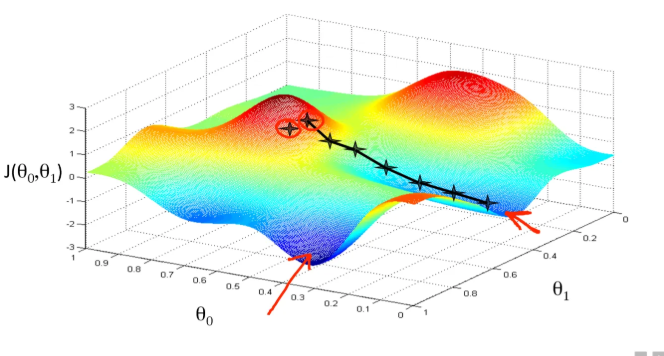

#  Gradient Descent 

## 🔍 Definition

**Gradient Descent** is an optimization algorithm used to minimize a loss function by iteratively moving in the direction of the **negative gradient** of the function with respect to the model's parameters (e.g., weights).

The general update rule is:

$$
w \leftarrow w - \eta \cdot \frac{\partial L}{\partial w}
$$

Where:  
- $w$: current weight  
- $\eta$: learning rate (step size)  
- $\frac{\partial L}{\partial w}$: gradient of the loss function $L$ with respect to the weight


---

## 🧠 Intuitive Analogy

Imagine you're standing on a mountain (a high loss value) and want to get to the bottom (minimum loss). Since it's foggy, you can't see far — so you check the **steepness and direction (gradient)** at your feet and take a small step downhill.

- The **steepness** tells you how far the loss is changing (gradient magnitude).
- The **direction** tells you where to step to decrease the loss.

You repeat this process — check the slope, step downhill — until you reach a flat area (minimum loss).

---

## 🔁 Types of Gradient Descent

### 1. **Batch Gradient Descent (Vanilla Gradient Descent)**

Uses the **entire dataset** to compute the gradient:

$$
w \leftarrow w - \eta \cdot \frac{1}{N} \sum_{i=1}^{N} \frac{\partial L_i}{\partial w}
$$

- Accurate but slow
- Requires full pass through the dataset each step

---

### 2. **Stochastic Gradient Descent (SGD)**

Uses **one data point** at a time to update weights:

$$
w \leftarrow w - \eta \cdot \frac{\partial L_i}{\partial w}
$$

- Faster but more noisy
- Can escape local minima due to noise

---

### 3. **Mini-Batch Gradient Descent**

Uses a **small subset (mini-batch)** of data to compute the gradient:

$$
w \leftarrow w - \eta \cdot \frac{1}{m} \sum_{j=1}^{m} \frac{\partial L_j}{\partial w}
$$

- Most commonly used in practice
- Balances performance and accuracy

---



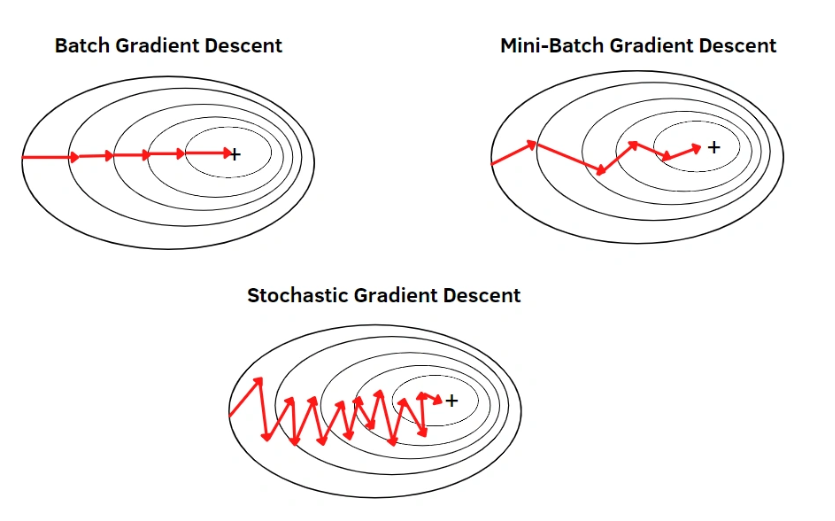

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2,3)
        self.fc2 = nn.Linear(3,1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)    
        return x
    

model = NeuralNetwork()

inputs = torch.randint(1, 11, (10, 2), dtype=torch.float32)
y_true = torch.randint(0, 2, (10, 1), dtype= torch.float32)


loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 500

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(inputs)
    loss = loss_function(y_pred, y_true)
    
    loss.backward()
    
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}: Loss: {loss.item():6f}")
    
    
    
    


        

        
        
    

Epoch: 0: Loss: 0.659590
Epoch: 10: Loss: 0.657317
Epoch: 20: Loss: 0.655154
Epoch: 30: Loss: 0.653096
Epoch: 40: Loss: 0.651136
Epoch: 50: Loss: 0.649271
Epoch: 60: Loss: 0.647495
Epoch: 70: Loss: 0.645805
Epoch: 80: Loss: 0.644195
Epoch: 90: Loss: 0.642662
Epoch: 100: Loss: 0.641203
Epoch: 110: Loss: 0.639812
Epoch: 120: Loss: 0.638488
Epoch: 130: Loss: 0.637227
Epoch: 140: Loss: 0.636025
Epoch: 150: Loss: 0.634880
Epoch: 160: Loss: 0.633789
Epoch: 170: Loss: 0.632749
Epoch: 180: Loss: 0.631759
Epoch: 190: Loss: 0.630814
Epoch: 200: Loss: 0.629914
Epoch: 210: Loss: 0.629056
Epoch: 220: Loss: 0.628237
Epoch: 230: Loss: 0.627457
Epoch: 240: Loss: 0.626713
Epoch: 250: Loss: 0.626004
Epoch: 260: Loss: 0.625327
Epoch: 270: Loss: 0.624681
Epoch: 280: Loss: 0.624065
Epoch: 290: Loss: 0.623478
Epoch: 300: Loss: 0.622917
Epoch: 310: Loss: 0.622382
Epoch: 320: Loss: 0.621872
Epoch: 330: Loss: 0.621385
Epoch: 340: Loss: 0.620920
Epoch: 350: Loss: 0.620476
Epoch: 360: Loss: 0.620052
Epoch: 370: 

In [9]:
test_data = torch.tensor((2,1), dtype=torch.float32)
test_data

model(test_data)

tensor([0.6534], grad_fn=<SigmoidBackward0>)

In [3]:
import torch
inputs = torch.randint(1, 11, (10, 2), dtype=torch.float32)
inputs
y_true = torch.randint(0, 2, (10, 1), dtype= torch.float32)
y_true

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.]])